In [44]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot

In [2]:
train_df = pd.read_csv('./data/train.csv', header=0)
test_df = pd.read_csv('./data/test.csv', header=0)

In [3]:
print(train_df.shape)
print(train_df.head())
print(train_df.columns)
print(train_df.isnull().sum())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [4]:
print(test_df.shape)
print(test_df.head)
print(test_df.columns)
print(test_df.isnull().sum())

(418, 11)
<bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Emb

In [5]:
# X = train_df.copy()
# tmp = pd.Series([X[c].value_counts().index[0]
#             if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
#             index=X.columns)

# tmp

In [6]:
# X[(X['PassengerId'] == 446)]

In [7]:
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
                            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
                            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [8]:
X = train_df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']]

y = train_df[['Survived']]

In [9]:
X['Sex'] = X['Sex'].apply(lambda x: 1 if x=='male' else 2)
X['Sex']

c:\anaconda\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [10]:
print(X['Embarked'].unique())
print("-----------------")
print(X['Ticket'].unique())
print("-----------------")
print(X['Cabin'].unique())



['S' 'C' 'Q' nan]
-----------------
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '

In [11]:
print(X['Embarked'].isnull().sum())

print(X[(X['Embarked'].isnull())])

print(X['Embarked'].unique())


X['Embarked'].count()
for i in X['Embarked'].unique():
    print(i, X['Embarked'][(X['Embarked']==i)].count())
    


2
     PassengerId  Pclass                                       Name  Sex  \
61            62       1                        Icard, Miss. Amelie    2   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)    2   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   38.0      0      0  113572  80.0   B28      NaN  
829  62.0      0      0  113572  80.0   B28      NaN  
['S' 'C' 'Q' nan]
S 644
C 168
Q 77
nan 0


In [12]:
X['Embarked'] = X['Embarked'].fillna('S')

c:\anaconda\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
X['Embarked'] = X['Embarked'].apply(lambda x :1 if x=='S' else (2 if x=='C' else 3))
X['Embarked'].unique()

c:\anaconda\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1, 2, 3], dtype=int64)

In [14]:
X.columns
X = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Fare', 'Embarked']]

In [15]:
model = xgb.XGBClassifier()
model.fit(X,y)

c:\anaconda\envs\python37\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\envs\python37\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

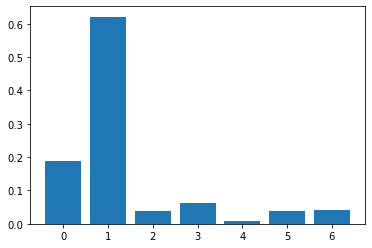

In [16]:
# model.feature_importances_
# pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
# pyplot.show()

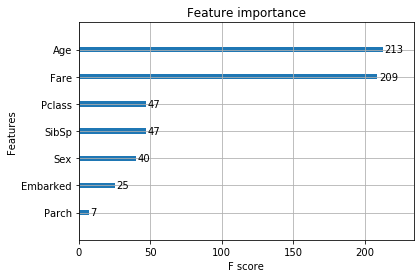

In [25]:
xgb.plot_importance(model)
pyplot.show()

In [17]:
feature_col_to_use = ['Pclass','Sex','Age','Fare','Parch']
nonnumeric_columns = ['Sex']

In [18]:
big_X = train_df[feature_col_to_use].append(test_df[feature_col_to_use])
big_X_imputed = DataFrameImputer().fit_transform(big_X)

In [19]:
le = LabelEncoder()
for feature in nonnumeric_columns:
    big_X_imputed[feature] = le.fit_transform(big_X_imputed[feature])


In [35]:
train_X = big_X_imputed[0:train_df.shape[0]].as_matrix()
test_X = big_X_imputed[train_df.shape[0]::].as_matrix()
train_y = train_df['Survived']

c:\anaconda\envs\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\anaconda\envs\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [37]:
tmp_train_x = train_X[:-100, :]
tmp_test_x = train_X[-100:, :]
tmp_train_y = train_y[:-100]
tmp_test_y = train_y[-100:]

print(tmp_train_x.shape)
print(tmp_test_x.shape)
print(tmp_train_y.shape)
print(tmp_test_y.shape)


(791, 5)
(100, 5)
(791,)
(100,)


In [21]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_X, train_y)
predictions = gbm.predict(test_X)

In [48]:
model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(tmp_train_x, tmp_train_y)
tmp_y_pred = model.predict(tmp_test_x)
accuracy = accuracy_score(tmp_test_y, tmp_y_pred)
print(accuracy*100)

85.0


In [50]:
# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
#     print(selection)
    select_X_train = selection.transform(tmp_train_x)
#     print(select_X_train)
    # train model
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, tmp_train_y)
    # eval model
    select_X_test = selection.transform(tmp_test_x)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(tmp_y_pred, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.021, n=5, Accuracy: 97.00%
Thresh=0.037, n=4, Accuracy: 99.00%
Thresh=0.041, n=3, Accuracy: 91.00%
Thresh=0.187, n=2, Accuracy: 82.00%
Thresh=0.715, n=1, Accuracy: 82.00%


In [22]:
accuracy

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })

In [24]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
